In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization
import warnings
warnings.filterwarnings("ignore")

In [2]:
base_path = r"\Users\Young\Desktop\DeepLearning\PlantVillage-Dataset\raw\segmented"
random_seed = 111

categories = os.listdir(base_path)

In [3]:
print("All the class labels:- ",categories,"\n\nNo. of categories = ", len(categories))

All the class labels:-  ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites T

In [4]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(base_path+"/"+category)[:300]:
            file_ext = image_name.split(".")[-1]
            if (file_ext.lower() == "png") or (file_ext.lower() == "jpg") or (file_ext.lower() == "jpeg"):
                #print(f"\nCategory = {category}, Image name = {image_name}")
                img = cv2.imread(base_path+"/"+category+"/"+image_name)
                img_array = Image.fromarray(img, 'RGB')
#resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
                resized_img = img_array.resize((227, 227))

                img_lst.append(np.array(resized_img))

                labels.append(index)
    return img_lst, labels
images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  11227 
No. of labels loaded =  11227
<class 'list'> <class 'list'>


In [5]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (11227, 227, 227, 3) 
Labels shape =  (11227,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


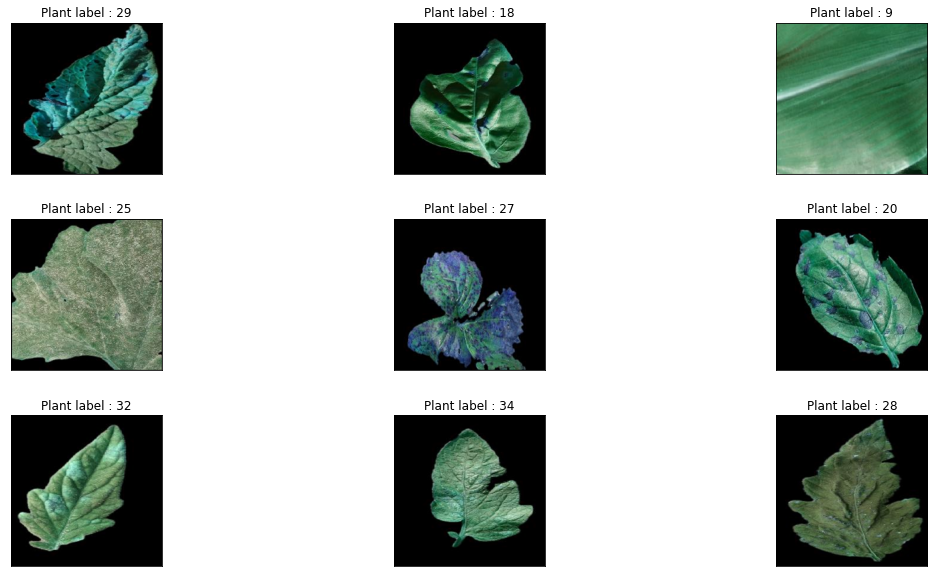

In [6]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Plant label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [7]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [    0     1     2 ... 11224 11225 11226]

'n' values after shuffling =  [11208  7133   541 ...  4182  4820 10196]


In [8]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (11227, 227, 227, 3) 
Labels shape after shuffling =  (11227,)


In [9]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (11227, 227, 227, 3)


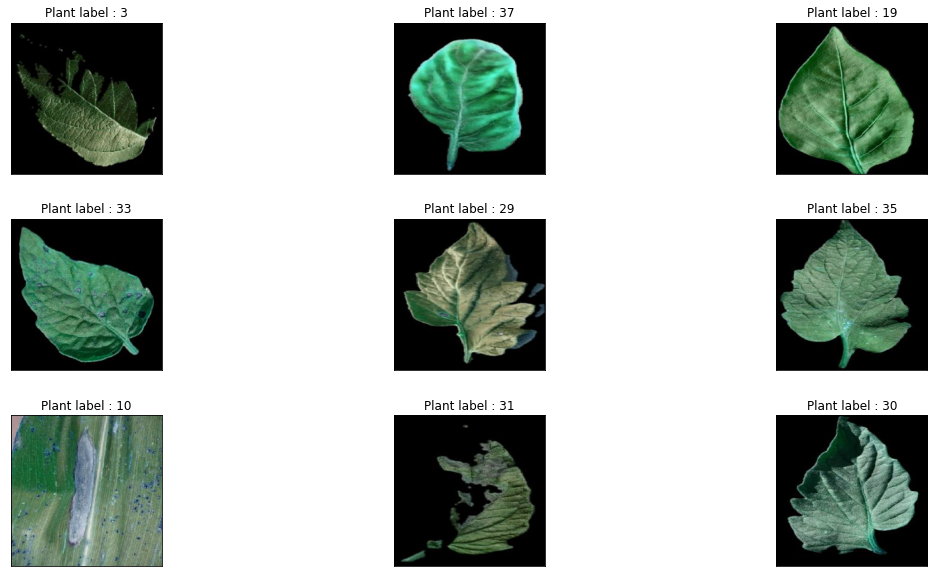

In [10]:
display_rand_images(images, labels)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (8981, 227, 227, 3)
y_train shape =  (8981,)

x_test shape =  (2246, 227, 227, 3)
y_test shape =  (2246,)


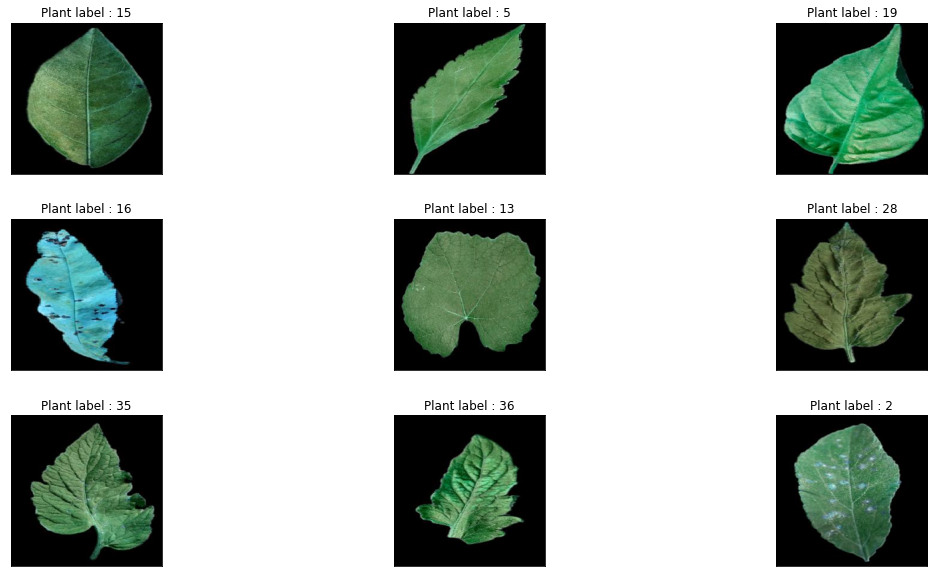

In [12]:
display_rand_images(x_train, y_train)

In [13]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())
#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())
#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())
#output layer
model.add(Dense(38,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

In [27]:
from keras import optimizers
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [42]:
history = model.fit(x_train, y_train, batch_size = 20, steps_per_epoch = 450,  epochs = 10)

Epoch 1/10
450/450 [==============================] - 305s 678ms/step - loss: 0.6167 - accuracy: 0.7984
Epoch 2/10
450/450 [==============================] - 311s 692ms/step - loss: 0.5593 - accuracy: 0.8155
Epoch 3/10
450/450 [==============================] - 297s 661ms/step - loss: 0.5351 - accuracy: 0.8256
Epoch 4/10
450/450 [==============================] - 301s 670ms/step - loss: 0.4700 - accuracy: 0.8469
Epoch 5/10
450/450 [==============================] - 291s 646ms/step - loss: 0.4246 - accuracy: 0.8575
Epoch 6/10
450/450 [==============================] - 307s 682ms/step - loss: 0.3927 - accuracy: 0.8697
Epoch 7/10
450/450 [==============================] - 295s 656ms/step - loss: 0.3800 - accuracy: 0.8774
Epoch 8/10
450/450 [==============================] - 310s 689ms/step - loss: 0.3441 - accuracy: 0.8862
Epoch 9/10
450/450 [==============================] - 299s 664ms/step - loss: 0.3224 - accuracy: 0.8919
Epoch 10/10
450/450 [==============================] - 289s 643m

Text(0.5, 1.0, 'Accuracy Curves')

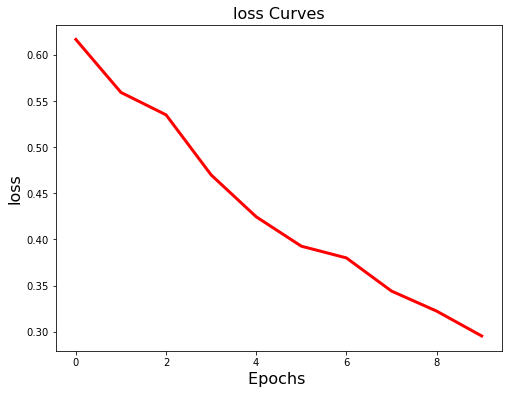

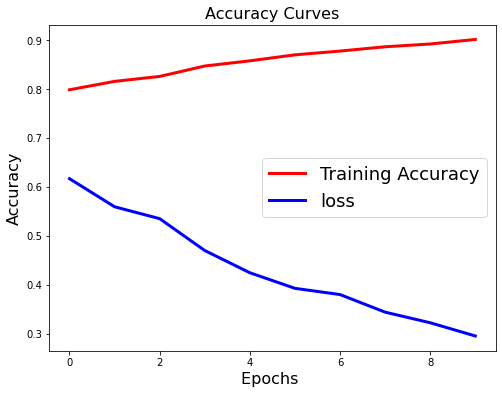

In [43]:
#Plot the Graph
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
#plt.plot(history.history['Epochs'],'b',linewidth=3.0)
#plt.legend(['Training loss', 'Epoch'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['loss'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [44]:
pred = model.predict(x_test).round()

pred.shape

71/71 [==============================] - 18s 260ms/step


(2246, 38)

Plant label : 31
Plant label : 1
Plant label : 14
Plant label : 22
Plant label : 19
Plant label : 23
Plant label : 2
Plant label : 31
Plant label : 0


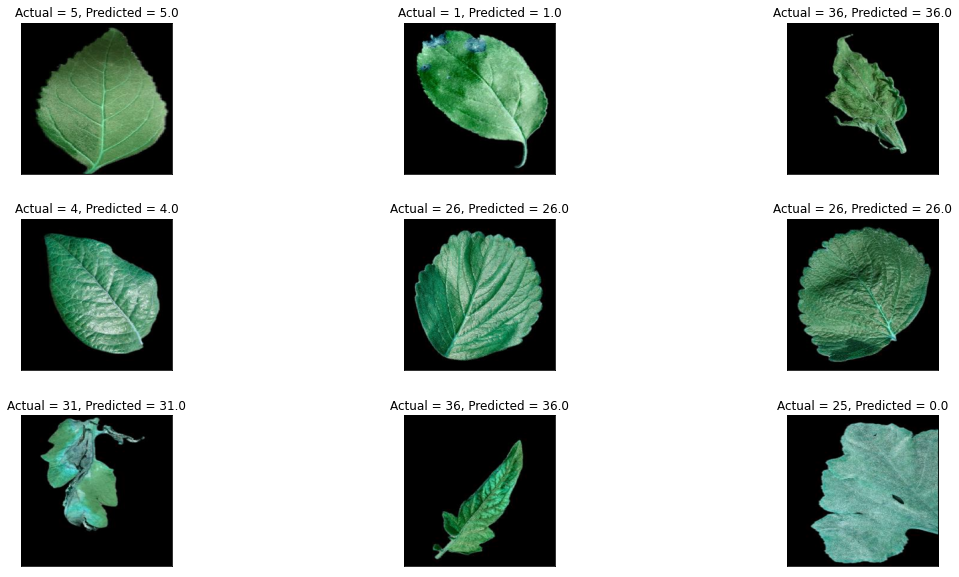

In [47]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])
    print('Plant label : {}'.format(labels[r[0]]))
    

plt.show()

In [48]:
print("Saving the model......")
# save model in JSON format
model_json = model.to_json()
json_file = open( r"\Users\Young\Desktop\DeepLearning\model1.json", "w")
json_file.write(model_json)
print("Model saved in JSON format!")
    
# save training weights in h5 file
model.save_weights(r"\Users\Young\Desktop\DeepLearning\model1.h5")
print("\nModel weights saved!")

Saving the model......
Model saved in JSON format!

Model weights saved!
